In [2]:
%matplotlib inline

In [8]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Read the City and Ride Data
df = pd.read_csv('ride_data.csv').merge(pd.read_csv('city_data.csv'))
df_merged = ride_df.merge(city_df, how='left')
df_merged.to_excel("output.xlsx")

# Display the data table for preview

df_merged.head(5)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [9]:
urban = df_merged.set_index(df_merged['type']).loc['Urban']

se guardan los tipos "urban suburban etc"
se calcula el total de los viajes hechos por ciudad
se calcula el promedio de cobro

(19, 44)

(0, 41)

Text(0.5, 1.0, 'Pyber Ride Sharing Data (2016)')

Text(0.5, 0, 'Total Number of Rides(Per City)')

Text(0, 0.5, 'Average Fare ($)')

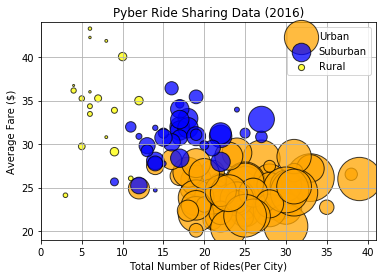

In [11]:

#urban average fares y_axis
urban = df_merged.loc[(df_merged['type'] == 'Urban')]
urban = urban.groupby(['city'])
urban_fare_avg = urban['fare'].mean()
#urban total rides x_axis
urban_total_rides = urban['city'].count()
#axis
x_urban = urban_total_rides
y_urban = urban_fare_avg
#a
urban_total_drivers = urban['driver_count'].sum()


#suburban average fares y_axis
suburban = df_merged.loc[(df_merged['type'] == 'Suburban')]
suburban = suburban.groupby(['city'])
suburban_fare_avg = suburban['fare'].mean()
#suburban total rides x_axis
suburban_total_rides = suburban['city'].count()

#axis
x_suburban = suburban_total_rides
y_suburban = suburban_fare_avg

suburban_total_drivers = suburban['driver_count'].sum()

#rural average fares y_axis
rural = df_merged.loc[(df_merged['type'] == 'Rural')]
rural = rural.groupby(['city'])
rural_fare_avg = rural['fare'].mean()
#suburban total rides x_axis
rural_total_rides = rural['city'].count()
#axis
x_rural = rural_total_rides
y_rural = rural_fare_avg

#
rural_total_drivers = rural['driver_count'].sum()



#axis limits
plt.ylim(19, 44)
plt.xlim(0,41)

plt.scatter(x_urban, y_urban, marker="o", facecolors="orange", edgecolors="black", 
            s=urban_total_drivers, alpha=0.75, label='Urban')
plt.scatter(x_suburban, y_suburban, marker="o", facecolors="blue", edgecolors="black", 
            s=suburban_total_drivers, alpha=0.75, label ='Suburban')
plt.scatter(x_rural, y_rural, marker="o", facecolors="yellow", edgecolors="black", 
            s=rural_total_drivers, alpha=0.75, label ='Rural')
plt.legend(loc="best")
plt.grid()

plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides(Per City)')
plt.ylabel('Average Fare ($)')

## Bubble Plot of Ride Sharing Data

## Total Fares by City Type

([<matplotlib.patches.Wedge at 0x104b67e80>,
 [Text(1.169693147981355, 0.26798869298063277, 'Urban'),
  Text(-0.8183497488822089, 0.735053527645726, 'Rural'),
  Text(-0.9955955489328239, -0.46774940186509, 'Suburban')],
 [Text(0.6823210029891238, 0.15632673757203577, '62.7%'),
  Text(-0.44637259029938664, 0.40093828780675955, '6.8%'),
  Text(-0.543052117599722, -0.2551360373809582, '30.5%')])

(-1.1112563362116055,
 1.2148058462589555,
 -1.0924589717218391,
 1.1366907384688834)

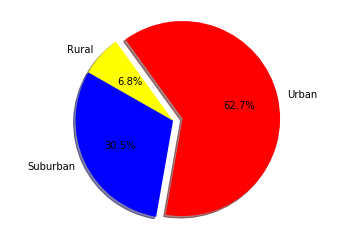

In [6]:
# Calculate Type Percents
total_fares = df_merged['fare'].sum()
urban_fares = (urban['fare'].sum()).sum() / total_fares * 100
suburban_fares = (suburban['fare'].sum()).sum() / total_fares * 100
rural_fares = (rural['fare'].sum()).sum() / total_fares * 100

# Build Pie Chart
total_fa = [urban_fares,rural_fares,suburban_fares]
types = ['Urban','Rural','Suburban']
explode = [0.1,0,0]
colors = ['red','yellow','blue']

plt.pie(total_fa, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260,)
# Save Figure
plt.axis("equal")

In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

68.42105263157895

([<matplotlib.patches.Wedge at 0x117662b00>,
 [Text(1.1033094885454109, 0.4719196674071382, 'Urban'),
  Text(-1.0032493053238525, 0.4510995803225798, 'Rural'),
  Text(-0.9263707884205817, -0.5931586317006858, 'Suburban')],
 [Text(0.6435972016514897, 0.2752864726541639, '68.4%'),
  Text(-0.5472268938130104, 0.24605431653958892, '5.3%'),
  Text(-0.5052931573203173, -0.3235410718367377, '26.3%')])

(-1.1151552225377388,
 1.2128331839959388,
 -1.0866301662689613,
 1.1534623888620021)

Text(0.5, 1.0, '% of Total Rides by City Type')

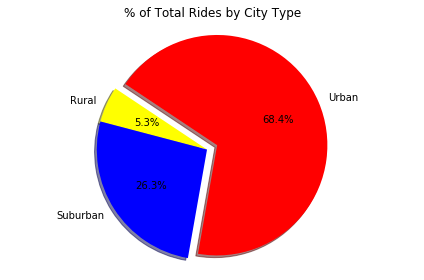

In [26]:
# Calculate Type Percents
total_types = df_merged['type'].count()
urban_riders = urban_total_rides.sum() / total_types * 100
suburban_riders = suburban_total_rides.sum() / total_types * 100
rural_riders = rural_total_rides.sum() / total_types * 100

urban_riders
# Build Pie Chart
total_riders = [urban_riders,rural_riders,suburban_riders]
types = ['Urban','Rural','Suburban']
explode = [0.1,0,0]
colors = ['red','yellow','blue']

plt.pie(total_riders, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260,)
# Save Figure
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.tight_layout()

In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

([<matplotlib.patches.Wedge at 0x116754fd0>,
 [Text(1.1526907506551585, 0.33362259119257415, 'Urban'),
  Text(-1.0933376503013517, 0.12088334224995327, 'Rural'),
  Text(-1.0488064948579858, -0.3316699207701927, 'Suburban')],
 [Text(0.6724029378821756, 0.19461317819566826, '86.7%'),
  Text(-0.5963659910734646, 0.0659363684999745, '0.8%'),
  Text(-0.5720762699225377, -0.18091086587465052, '12.5%')])

(-1.11296777031287,
 1.2064529867003482,
 -1.0785783123965365,
 1.1340350298895325)

Text(0.5, 1.0, '% of Total Drivers by City Type')

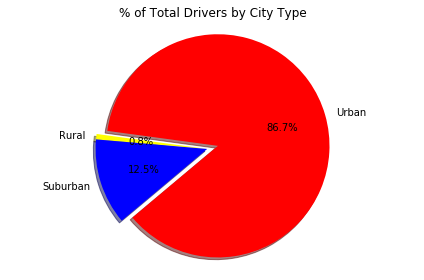

In [31]:
# Calculate Driver Percents
total_drivers = df_merged['driver_count'].sum()

urban_drivers = (urban['driver_count'].sum()).sum() / total_drivers * 100
suburban_drivers = (suburban['driver_count'].sum()).sum() / total_drivers * 100
rural_drivers = (rural['driver_count'].sum()).sum() / total_drivers * 100


# Build Pie Chart
total_drivers = [urban_drivers,rural_drivers,suburban_drivers]
types = ['Urban','Rural','Suburban']
explode = [0.1,0,0]
colors = ['red','yellow','blue']

plt.pie(total_drivers, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=220,)
# Save Figure
plt.axis("equal")
# Build Pie Charts
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.tight_layout()

In [10]:
# Show Figure
plt.show()

In [ ]:
´´´´´´´´´´´´´´´                                                                                                         bnm